In [1]:
using SparseArrays
using LinearAlgebra
using Plots; pyplot()
#using ProfileVega
using SparseArrays, SharedArrays
#import Base.Threads.@spawn
#using BenchmarkTools

In [3]:
Base.Threads.nthreads()

6

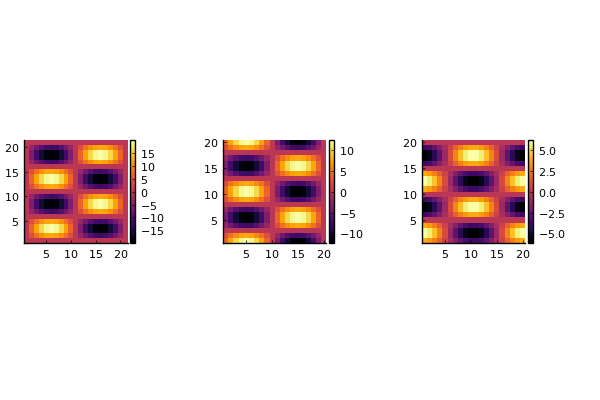

In [4]:
# Number of gradient points
k = 20

xk_amp = LinRange(0,4π,k+1); #+ np.random.rand(k+1) /4
yk_amp = LinRange(0,2π,k+1); #+ np.random.rand(k+1) /4


xk_array = xk_amp[1:end-1] + (xk_amp[2:end] - xk_amp[1:end-1])/2
yk_array = yk_amp[1:end-1] + (yk_amp[2:end] - yk_amp[1:end-1])/2

xk_2D = xk_amp .* ones(length(xk_amp))'
yk_2D = yk_amp' .* ones(length(yk_amp))



G_amp = sin.(xk_2D) *  sin.(yk_2D)
G_grad_x = G_amp[2:end,2:end] .- G_amp[1:end-1,2:end]
G_grad_y = G_amp[2:end,2:end] .- G_amp[2:end,1:end-1]

hms = [heatmap(x) for x in [G_amp,G_grad_x,G_grad_y]];
plot(hms...,layout =(1,3),aspect_ratio = :equal,grid=false,seriestype = :heatmap)



In [14]:
threads

6

111111  8.335955 seconds (580.75 k allocations: 6.144 GiB, 8.85% gc time, 2.02% compilation time)


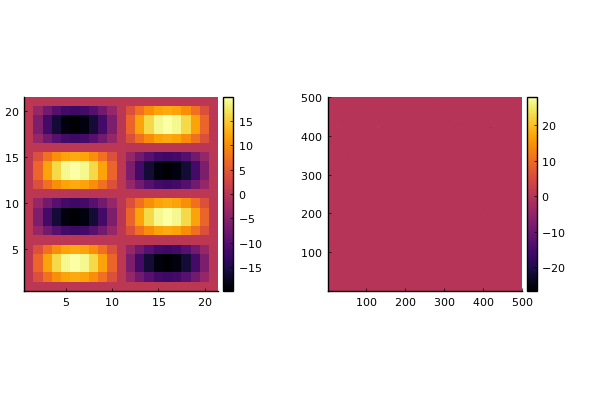

In [15]:
# !!! More paralisem
@time begin

    p = 10 #number of partners 
    #1 Linerise construct vector Gvia Eq. (2)
    G = [reshape(G_grad_x,(:)); reshape(G_grad_y,(:))];

    # 
    n_res = 500;
    Xn_array = LinRange(xk_array[1],xk_array[end],n_res);
    Yn_array = LinRange(yk_array[1],yk_array[end],n_res);


    Xn = reshape(Xn_array  .* ones(length(Xn_array))', (:)) 
    Yn = reshape(Yn_array' .* ones(length(Yn_array)) , (:))

    xk = reshape(xk_array  .* ones(length(xk_array))', (:))
    yk = reshape(yk_array' .* ones(length(yk_array)) , (:))

    K = length(xk)

    C = sparse(zeros(2*K, length(Xn)))
    A = 0

    #index_of_min_distance(x,y) = sortperm(sqrt.(x.^2 .+ y.^2))

    threads = Base.Threads.nthreads()
    
    Threads.@threads for k = 1:threads
        loop_legth = floor(length(xk)/threads)
        loop_start = (k-1)*loop_legth+1
        loop_end = k*loop_legth
        
        if k == threads
            loop_end = length(xk)
        end
        print(Threads.threadid())
        for i = UInt32(loop_start):UInt32(loop_end)
            #global M
            #global dist
        #     global Vx
        #     global Vy

            # calculate distance
            dX = xk[i] .- Xn
            dY = yk[i] .- Yn
            dist = sqrt.(dX.^2 .+ dY.^2)

            idx_dist_min = sortperm(dist) # get index of the closes points

            shape_points = idx_dist_min[1:p] # constuct array with the index of lowes distance 

            dX = Xn[shape_points] .- xk[i]
            dY = Yn[shape_points] .- yk[i]

            M = [ones(length(dX)) dX dY (dX.^2)./2  dX.*dY  (dX.^2)./2]'

            Vx = zeros(length(M[:,1]))
            Vx[2] = 1
            Vy = zeros(length(M[:,1]))
            Vy[3] = 1

            C[i,shape_points] = M \ Vx
            C[i+K,shape_points] = M \ Vy
        end
    end
    #C_append = sparse(zeros(size(C)[1]))
    C_append = zeros(size(C)[1])
    C_append[2] = 1
    C2 = [C C_append]
    Z = C2 \ G;
    #Z = C2 \ G;

end;

recreation = reshape(Z[1:end-1],(n_res,n_res))
hms = [heatmap(x) for x in [G_amp,recreation]];
plot(hms...,layout =(1,2),aspect_ratio = :equal,grid=false,seriestype = :heatmap)



In [6]:
a = end

LoadError: syntax: unexpected "end"

In [7]:
floor(11/3)

3.0

  1.738421 seconds (4.38 M allocations: 370.738 MiB, 11.20% gc time, 90.12% compilation time)


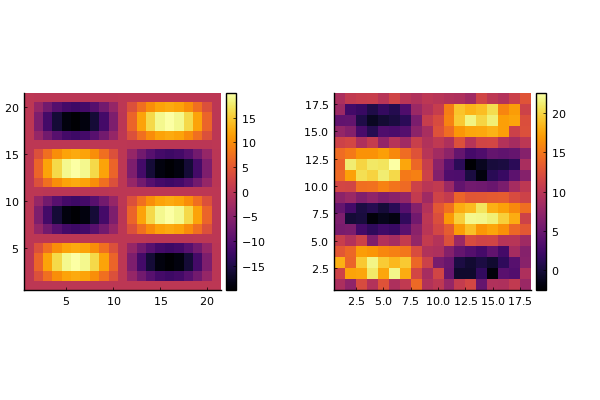

In [8]:
@time begin

    p = 10 #number of partners 
    #1 Linerise construct vector Gvia Eq. (2)
    G = [reshape(G_grad_x,(:)); reshape(G_grad_y,(:))];

    # 
    n_res = 18;
    Xn_array = LinRange(xk_array[1],xk_array[end],n_res);
    Yn_array = LinRange(yk_array[1],yk_array[end],n_res);


    Xn = reshape(Xn_array  .* ones(length(Xn_array))', (:)) 
    Yn = reshape(Yn_array' .* ones(length(Yn_array)) , (:))

    xk = reshape(xk_array  .* ones(length(xk_array))', (:))
    yk = reshape(yk_array' .* ones(length(yk_array)) , (:))

    K = length(xk)

    C = sparse(zeros(2*K, length(Xn)))
    A = 0

    #index_of_min_distance(x,y) = sortperm(sqrt.(x.^2 .+ y.^2))


    
    for i = 1:length(xk)
        #global M
        #global dist
    #     global Vx
    #     global Vy

        # calculate distance
        dX = xk[i] .- Xn
        dY = yk[i] .- Yn
        dist = sqrt.(dX.^2 .+ dY.^2)

        idx_dist_min = sortperm(dist) # get index of the closes points

        shape_points = idx_dist_min[1:p] # constuct array with the index of lowes distance 

        dX = Xn[shape_points] .- xk[i]
        dY = Yn[shape_points] .- yk[i]

        M = [ones(length(dX)) dX dY (dX.^2)./2  dX.*dY  (dX.^2)./2]'

        Vx = zeros(length(M[:,1]))
        Vx[2] = 1
        Vy = zeros(length(M[:,1]))
        Vy[3] = 1

        C[i,shape_points] = M \ Vx
        C[i+K,shape_points] = M \ Vy

    end

    #C_append = sparse(zeros(size(C)[1]))
    C_append = zeros(size(C)[1])
    C_append[2] = 1
    C2 = [C C_append]
    Z = C2 \ G;
    #Z = C2 \ G;

end;

recreation = reshape(Z[1:end-1],(n_res,n_res))
hms = [heatmap(x) for x in [G_amp,recreation]];
plot(hms...,layout =(1,2),aspect_ratio = :equal,grid=false,seriestype = :heatmap)



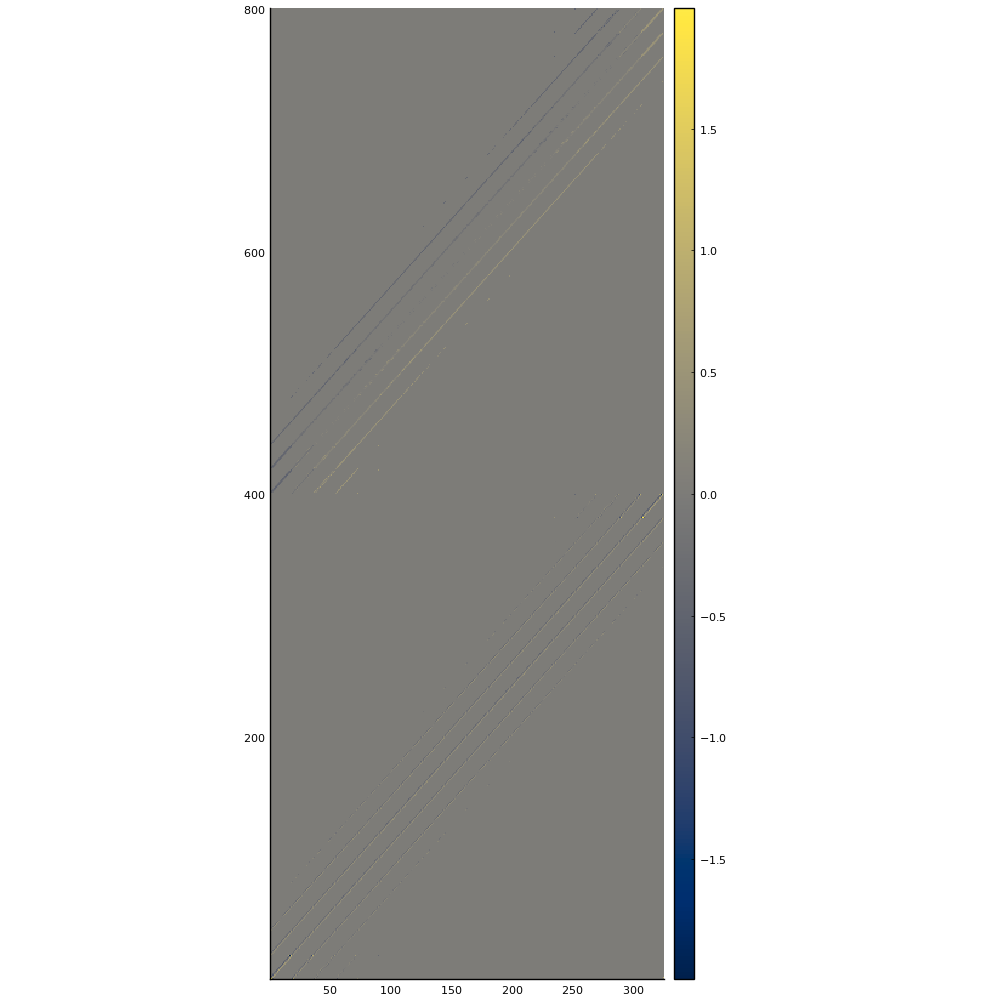

In [9]:
heatmap(C2,
    aspect_ratio = :equal,
    c = :cividis,
    size= (1000,1000)
    )

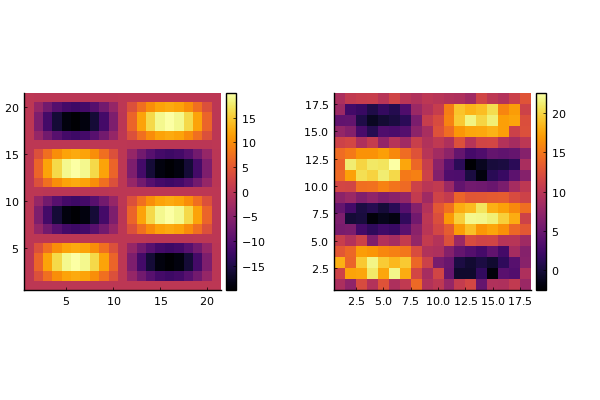

In [10]:
recreation = reshape(Z[1:end-1],(n_res,n_res))

hms = [heatmap(x) for x in [G_amp,recreation]];

plot(hms...,layout =(1,2),aspect_ratio = :equal,grid=false,seriestype = :heatmap)

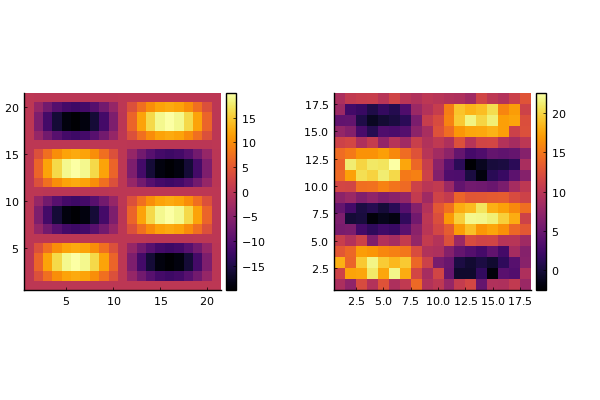

In [11]:
recreation = reshape(Z[1:end-1],(n_res,n_res))
hms = [heatmap(x) for x in [G_amp,recreation]];
plot(hms...,layout =(1,2),aspect_ratio = :equal,grid=false,seriestype = :heatmap)

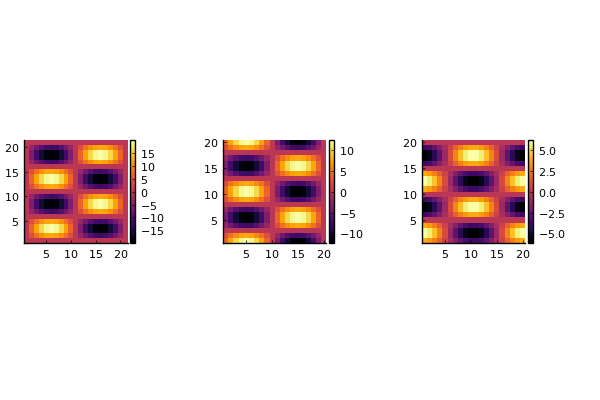

In [12]:
hms = [heatmap(x) for x in [G_amp,G_grad_x,G_grad_y]];
plot(hms...,layout =(1,3),aspect_ratio = :equal,grid=false,seriestype = :heatmap)


In [13]:
#fig = figure("Line Collection Example",figsize=(10,10))

# heatmap(C,
#     aspect_ratio = :equal,
#     c = :cividis,
#     size= (1000,1000)
#     )
